Dear Participant,

Please find below the the files required to complete the internal lab assessment.

R7_InternalLab_Questions-1.ipynbView in a new window


Below is the Github link to accept the assignment. 

Github Link: https://classroom.github.com/a/WSWMHTtW

Kindly refer the Github module before uploading your submission.

The final submission of this lab assessment should be made on Olympus. Please submit the Github link of your work.

Please note: Since now, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - ResidencyNumber_TypeofLab.ipynb

Ex -R7_InternalLab.ipynb

Regards

Program Office

## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [3]:
print("Number of samples in x_train is",x_train.shape[0])
print("Number of samples in x_test is",x_test.shape[0])
print("Number of samples in y_train is",y_train.shape[0])
print("Number of samples in y_train is",y_test.shape[0])

Number of samples in x_train is 60000
Number of samples in x_test is 10000
Number of samples in y_train is 60000
Number of samples in y_train is 10000


### Find dimensions of an image in the dataset

In [4]:
print("Number of samples in x_train is",x_train.shape)
print("Number of samples in x_test is",x_test.shape)
print("Number of samples in y_train is",y_train.shape)
print("Number of samples in y_train is",y_test.shape)

Number of samples in x_train is (60000, 28, 28)
Number of samples in x_test is (10000, 28, 28)
Number of samples in y_train is (60000,)
Number of samples in y_train is (10000,)


In [0]:
#import pandas as pd
#y_train_df = pd.DataFrame(y_train)
#pd.value_counts(y_train_df)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_train.shape

(60000, 10)

In [7]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_test.shape

(10000, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils, Sequence
from keras.preprocessing.image import ImageDataGenerator
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [13]:
# Define model
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]



Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [14]:
# Train the model
model.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.3746 - acc: 0.8641 - val_loss: 0.3039 - val_acc: 0.8883
Epoch 2/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.2351 - acc: 0.9131 - val_loss: 0.2569 - val_acc: 0.9067
Epoch 3/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.1743 - acc: 0.9343 - val_loss: 0.2457 - val_acc: 0.9113
Epoch 4/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.1228 - acc: 0.9544 - val_loss: 0.2889 - val_acc: 0.9103
Epoch 5/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0877 - acc: 0.9666 - val_loss: 0.3080 - val_acc: 0.9097
Epoch 6/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0599 - acc: 0.9777 - val_loss: 0.3289 - val_acc: 0.9129
Epoch 7/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0428 - acc: 0.9846 - val_loss: 0.

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
__________

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [16]:
# Define model
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# Max Pooling Layer
model1.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Dropout Layer
model1.add(Dropout(0.25))

# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [17]:
# Train the model
model1.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.4428 - acc: 0.8419 - val_loss: 0.3251 - val_acc: 0.8840
Epoch 2/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.2939 - acc: 0.8929 - val_loss: 0.2660 - val_acc: 0.9053
Epoch 3/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.2466 - acc: 0.9085 - val_loss: 0.2674 - val_acc: 0.9046
Epoch 4/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.2156 - acc: 0.9200 - val_loss: 0.2389 - val_acc: 0.9133
Epoch 5/10
60000/60000 [==============================] - 14s 237us/step - loss: 0.1878 - acc: 0.9298 - val_loss: 0.2651 - val_acc: 0.9039
Epoch 6/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.1657 - acc: 0.9383 - val_loss: 0.2611 - val_acc: 0.9167
Epoch 7/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.1469 - acc: 0.9445 - val_loss: 0.

In [18]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               495744    
__________

### Now, to the above model, lets add Data Augmentation 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


### Import the ImageDataGenrator from keras and fit the training images

In [0]:
# Prepare the generator
datagen.fit(x_train)

In [21]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

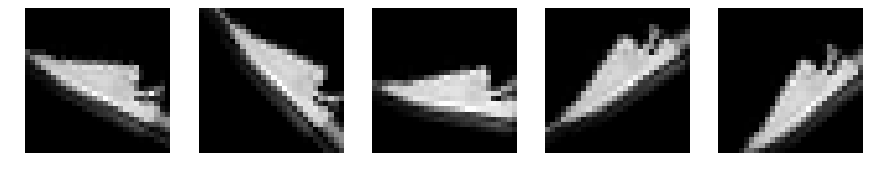

In [22]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[6:7], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [23]:
model1.fit_generator(datagen.flow(x_train,y_train, batch_size=64), steps_per_epoch=10, epochs=5, verbose=1)

Epoch 1/5
10/10 [==============================] - 0s 23ms/step - loss: 2.8369 - acc: 0.4203
Epoch 2/5
10/10 [==============================] - 0s 20ms/step - loss: 1.5625 - acc: 0.4625
Epoch 3/5
10/10 [==============================] - 0s 22ms/step - loss: 1.4427 - acc: 0.4859
Epoch 4/5
10/10 [==============================] - 0s 20ms/step - loss: 1.3733 - acc: 0.5156
Epoch 5/5
10/10 [==============================] - 0s 21ms/step - loss: 1.2573 - acc: 0.5563


###  Report the final train and validation accuracy

In [24]:
model1.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 73us/step


[0.3920044635295868, 0.8666]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [27]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [28]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

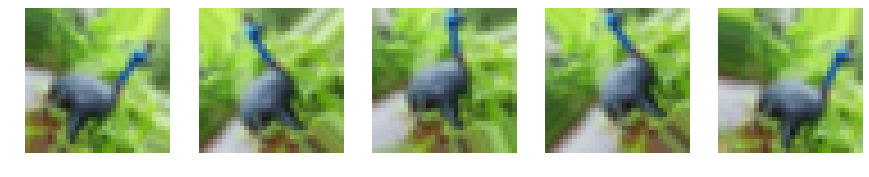

In [31]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[6:7], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype(int), cmap='gray')
    plt.plot()
    #print(gen.next().squeeze().astype(int)) #prinying the value of image.
plt.show()